#### import required packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler

#### Loading Data

In [3]:
df = pd.read_csv("files/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


###### scaler transformer defination

In [4]:
sx = MinMaxScaler()
sy = MinMaxScaler()

#### Scaling Data

In [5]:
X_scaled = sx.fit_transform(df.drop("price", axis= 'columns'))
y_scaled = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

In [6]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

### Implemating general purpose Batch Gradient Descent

In [8]:
def bgd(X, y_true, epochs, learning_rate= 0.01):
    number_of_feature = X.shape[1]  #no. of columns
    w = np.ones(shape= (number_of_feature,))   # ndim = 1D--> rows
    b = 0
    total_sample = X.shape[0]

    # compute derivative and update the weights and bias
    # prediction based on current weights and dimention
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, X.T) + b  #bcz w = 1d(1,n) and X= 2d(m,n) n= no. of feature , m = no. of sample
                                        # y_predicted shape = (1,m) and y_true= (m,1)
        
        
    
        wd = -(2/total_sample)*(X.T.dot(y_true - y_predicted))
        bd = -(2/total_sample)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * wd
        b = b - learning_rate * bd
        
        y_predicted = np.dot(w, X.T) + b
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"epoch: {i}, w: {w}, b: {b}, loss: {cost}")
            
    return w, b, cost, cost_list, epoch_list
        
        
    
    

In [9]:
w, b, cost, cost_list, epocch_list = bgd(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 1000,)

epoch: 0, w: [0.99551317 0.99445655], b: -0.009603223499361428, loss: 0.26276673457254596
epoch: 10, w: [0.95630831 0.94626642], b: -0.09163530752945695, loss: 0.15766501024727825
epoch: 20, w: [0.92561534 0.90895369], b: -0.1526797697123304, loss: 0.09750510556972952
epoch: 30, w: [0.9013738  0.87987065], b: -0.19789162051248474, loss: 0.0629845575622148
epoch: 40, w: [0.88202714 0.8570175 ], b: -0.23116355287977375, loss: 0.04309454988915444
epoch: 50, w: [0.86639945 0.8388837 ], b: -0.2554349736249456, loss: 0.03155627438599145
epoch: 60, w: [0.85360224 0.82432823], b: -0.27292538144121864, loss: 0.02478853208737036
epoch: 70, w: [0.8429641  0.81248913], b: -0.2853106120900698, loss: 0.020748623996523288
epoch: 80, w: [0.83397757 0.80271516], b: -0.2938559373058315, loss: 0.01827129260602433
epoch: 90, w: [0.826259   0.79451428], b: -0.2995165799588363, loss: 0.016691709532086003
epoch: 100, w: [0.81951826 0.78751463], b: -0.30301362222683875, loss: 0.015630459085441334
epoch: 110, 

In [10]:
w,b,cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.004863885249279305)

##### ploting convergence of wiegths w.r.t epoch and cost

<Figure size 1440x1296 with 0 Axes>

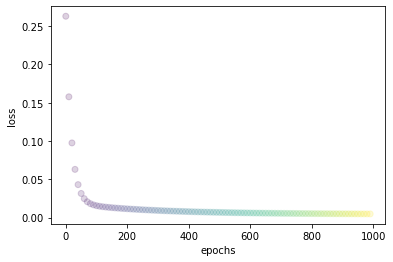

<Figure size 1440x1296 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
plt.scatter(epocch_list, cost_list, alpha= 0.18, c= epocch_list)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.figure(figsize=(20,18))

# SGD

In [27]:
def sgd(X, y_true, epochs, learning_rate= 0.01):
    from random import randint
    number_of_feature = X.shape[1]  #no. of columns
    w = np.ones(shape= (number_of_feature,))   # ndim = 1D--> rows
    b = 0
    total_sample = X.shape[0]

    # compute derivative and update the weights and bias
    # prediction based on current weights and dimention
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = randint(0, X.shape[0]-1)
        X_sample = X[random_index]
        y_sample = y_true[random_index]
        
        y_predicted = np.dot(w, X_sample.T) + b  #bcz w = 1d(1,n) and X= 2d(m,n) n= no. of feature , m = no. of sample
                                        # y_predicted shape = (1,m) and y_true= (m,1)
        
        
    
        wd = -(2/total_sample)*(X_sample.T.dot(y_sample - y_predicted))
        bd = -(2/total_sample)*np.sum(y_sample - y_predicted)
        
        w = w - learning_rate * wd
        b = b - learning_rate * bd
        
        y_predicted = np.dot(w, X_sample.T) + b
        cost = np.mean(np.square(y_sample - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"epoch: {i}, w: {w}, b: {b}, loss: {cost}")
            
    return w, b, cost, cost_list, epoch_list

In [38]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = sgd(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 3000,)

epoch: 0, w: [0.99955112 0.9996696 ], b: -0.0006607918263090677, loss: 0.43515251070495414
epoch: 10, w: [0.99799571 0.99761759], b: -0.0049135599353203495, loss: 0.24198562243105792
epoch: 20, w: [0.99655446 0.99556144], b: -0.00911163697296083, loss: 0.055929302875296884
epoch: 30, w: [0.99469284 0.9938324 ], b: -0.012891407242549434, loss: 0.053835584057114506
epoch: 40, w: [0.99129082 0.99016703], b: -0.018729877930903947, loss: 0.386059930247229
epoch: 50, w: [0.98903088 0.9877012 ], b: -0.023067855169053436, loss: 0.26151198653236907
epoch: 60, w: [0.98715011 0.98540637], b: -0.0273559642298596, loss: 0.38119508347399716
epoch: 70, w: [0.98417492 0.98196093], b: -0.03264101989679647, loss: 0.24808881304985989
epoch: 80, w: [0.98118252 0.97875528], b: -0.03758974554714, loss: 0.053048403436256684
epoch: 90, w: [0.97848409 0.9756245 ], b: -0.042549615051052266, loss: 0.2069879381827229
epoch: 100, w: [0.97692972 0.97388903], b: -0.04634720121147458, loss: 0.17468309106991614
epoch:

In [39]:
w_sgd, b_sgd, cost_sgd

(array([0.79202751, 0.76393618]), -0.30194308710085105, 0.004262705678444539)

#### sgd cost coversion

Text(0, 0.5, 'loss')

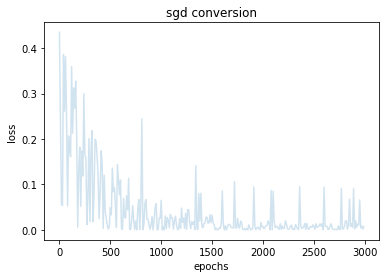

In [40]:
plt.plot(epoch_list_sgd, cost_list_sgd,  alpha= 0.2)
plt.title("sgd conversion")
plt.xlabel("epochs")
plt.ylabel("loss")

# Mini- Batch Gradient Descent

In [41]:
np.random.permutation()

<function RandomState.permutation>

In [ ]:
def sgd(X, y_true, epochs, learning_rate= 0.01):
    from random import randint
    number_of_feature = X.shape[1]  #no. of columns
    w = np.ones(shape= (number_of_feature,))   # ndim = 1D--> rows
    b = 0
    total_sample = X.shape[0]

    # compute derivative and update the weights and bias
    # prediction based on current weights and dimention
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = randint(0, X.shape[0]-1)
        X_sample = X[random_index]
        y_sample = y_true[random_index]
        
        y_predicted = np.dot(w, X_sample.T) + b  #bcz w = 1d(1,n) and X= 2d(m,n) n= no. of feature , m = no. of sample
                                        # y_predicted shape = (1,m) and y_true= (m,1)
        
        
    
        wd = -(2/total_sample)*(X_sample.T.dot(y_sample - y_predicted))
        bd = -(2/total_sample)*np.sum(y_sample - y_predicted)
        
        w = w - learning_rate * wd
        b = b - learning_rate * bd
        
        y_predicted = np.dot(w, X_sample.T) + b
        cost = np.mean(np.square(y_sample - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"epoch: {i}, w: {w}, b: {b}, loss: {cost}")
            
    return w, b, cost, cost_list, epoch_list